# Getting Started

This Jupyter notebook is a short demonstration of Python for scientific data analysis.
It covers the following points:

* Plotting a sine wave
* Generating a column matrix of data
* Writing data to a text-file, and reading data from a text-file
* Waiting for a button-press to continue the program exectution
* Using a dictionary, which is similar to MATLAB structures
* Extracting data which fulfill a certain condition
* Calculating the best-fit-line to noisy data
* Formatting text-output
* Waiting for a keyboard-press
* Calculating confidence intervals for line-fits
* Saving figures

author: Thomas Haslwanter;
date:   Nov-2022

# Modules and Packages

In Python you explicitly have to load the modules that you need.
Don't worry here about not knowing the right modules: *numpy*, *scipy*, and
*matplotlib.pyplot* are almost everything you will need most of the time, and you
will quickly get used to those.

# Sine Wave

In [1]:
# Note: single comment lines are indicated by "#".

# Create a sine-wave
t = np.arange(0,10,0.1)
x = np.sin(t)

# The basic numerical functions, as well as everything with vector ans matrices 
# is in the package "numpy".

# Next, save the data in a text-file, in column form.
out_file = 'test.txt'
np.savetxt(out_file, np.column_stack([t,x]) )

# For displaying formatted text, the "format-strings" introduced in Python 3.5
# are definitely the most elegant way: they allow to use known variables directly
# in the "print"-statement
print(f'Data have been saved to {out_file}.')

Data have been saved to test.txt.


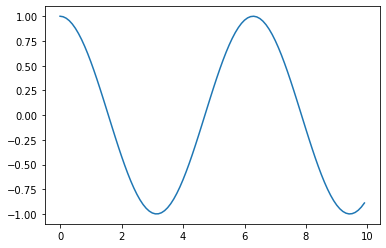

In [2]:
# Read the data into a different variable
inData = np.loadtxt(out_file)
t2 = inData[:,0] # Note that Python starts at "0"!
x2 = inData[:,1]

# Note: Python used (...) for function arguments, and [...] for indexing.

# Plot the data
plt.plot(t, np.cos(t))

# Rotating a Vector

When working with vectors and matrices, keep the following things in mind
* By default, data are vectors.
* Use *array* when you want to generate matrices.

# Noisy Data and Linefits

Fit the following function: $y = k*x + d$

In [3]:
# Generate a noisy line
t = np.arange(-100, 100)

# use a Python "dictionary" for named variables
par = {'offset':100, 'slope':0.5, 'noiseAmp':4}

# Everything with random numbers is in the numpy sub-package "np.random"
x = par['offset'] + par['slope']*t + par['noiseAmp']*np.random.randn(len(t))

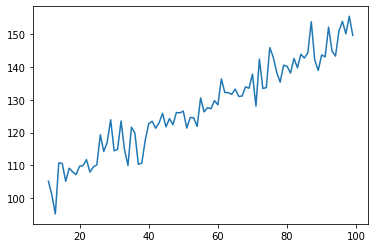

In [4]:
# Boolean indexing works in Python: select "late" values, i.e. with t>10
x_high = x[t>10]
t_high = t[t>10]

# Plot the "late" data
plt.plot(t_high, x_high)

In [5]:
# Boolean indices can be combined:
x = np.arange(10)
top_range = x>2
bottom_range = x<8
x[top_range & bottom_range]

array([3, 4, 5, 6, 7])

   ## Fitting a line to the data

In [6]:
# Determine the best-fit line
# To do so, you have to generate a so-called Design Matrix, with "time" in the first
# column, and a column of "1" in the second column:
x_mat = np.column_stack( [t_high, np.ones(len(t_high))])

# A numerical detail: For the least-squares solution to a linear matrix equation,
# the optional parameter "rcond" determines how  small singular values
# of the matrix are handled.
slope, intercept = np.linalg.lstsq(x_mat, x_high, rcond=None)[0]

Fit line: intercept = 98.875, and slope = 0.523


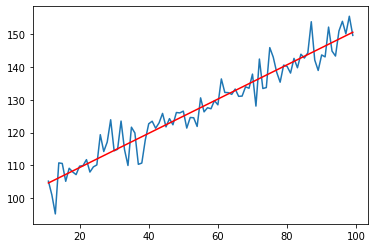

In [7]:
# Show and plot the fit, and save it to a PNG-file with a medium resolution.
# The "modern" way of Python-formatting is used
plt.plot(t_high, x_high)
plt.plot(t_high, intercept + slope*t_high, 'r')
plt.savefig('linefit.png', dpi=200)
print(f'Fit line: intercept = {intercept:5.3f}, and slope = {slope:5.3f}')

# Pingouin

In [9]:
# If you want to know confidence intervals, best switch to *pingouin*
import pingouin as pg
pg.linear_regression(t_high, x_high).round(3)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,98.875,0.969,101.995,0.0,0.925,0.924,96.948,100.802
1,x1,0.523,0.016,32.737,0.0,0.925,0.924,0.491,0.555


# More Python Info on the Web

* [Scipy Lecture Notes](https://scipy-lectures.org/) **If you read nothing else, read this!**
* [numpy-for-matlab-users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html) Start here if you have lots of Matlab experience.
* [The Python Tutorial](https://docs.python.org/3.11/tutorial/)  The original introduction.
* [jrjohansson's scientific-python-lectures](https://github.com/jrjohansson/scientific-python-lectures) Lectures on scientic computing with Python. Good ipython notebooks, but not very actively maintained
* [An introduction to seaborn](https://seaborn.pydata.org/tutorial/introduction.html) Especially for the visualization of statistical data, seaborn is extremely valuable